# Introduction
While dealing with a multi-class classification problem, logistic regression OvR can be applied only if the classes are linearly separable. hence polynomial regression should be used while dealing with a non-linear separation boundary, but the problem with this is that, feature engineering is difficult, as in, it is hard to guess which features are to be used for model building, what other relavant features can be created from existing features, etc.

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm widely used popularly for classification tasks, and regression tasks as well. It works by classifying a data point based on the labels of its nearest neighbors in the training data.

KNN assumes that similar data points tend to have similar labels. To classify a new data point, KNN finds the K closest data points (neighbors) in the training set based on distance metric (Euclidean, Manhattan, Cosine, etc). The majority vote (for classification), or average value (for regression) of these K neighbors is used to predict the label or value of the new data point.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20, 5)

# KNN Algorithm
1. Data preparation:
    - The data is prepared by ensuring that it is in a suitable format for distance calculation (usually numerical features).
    - Feature scaling might be necessary if features have different ranges.
2. Distance calculation: A distance metric is chosen to calculate the distance between the new data point, and each data point in the training set.
3. Find the nearest neighbors: Based on the calculated distances, the K closest data points (neighbors) to the new data point are identified. The value of K is a hyperparameter that needs to be tuned.
4. Prediction:
    - For classification: The most frequent class label among the K nearest neighbors is assigned to new data point (majority vote).
    - For regression: The average value of the target variable for the K nearest neighbors is used to predict the value for the new data point.

Alternatively,
1. For an unknown data point $x_i$, the distance between it and every training data point in the dataset. The choice of the distance metric depends on the number of dimensions.
2. After calculating the distances for all the training points, they are sorted in ascending order (lowest to highest) based on the distance from the new data point $x_i$. This ensures that the data points closest to $x_i$ are at the beginning of the sorted list.
3. The value of K, a hyperparameter, determines the number of nearest neighbors to consider for prediction. The K hyperparameter is curcial, and can be tuned based on the specific problem, and dataset. After sorting, the top K data points are chosen as the nearest neighbors for the new data point.
4. The value of K chosen should be such that it should not be a multiple of the number of classes. This is done to prevent a scenario where the unknown data point is at equidistant from 2 sets of data points. But in case where, after hyprparameter tuning, the best value IS a number that is a multiple of the number of classes, then in that case, either pick random between the classes, or pick the one that is the closest. Meaning, sum up the distances of all the points present in a particular class, do the same for all the classes. Now pick the class which has the lowest sum of distance.

# Feature Scaling in Distance Bases Algorithms
- For algorithms which work on distance, it is important to make sure that all the features are at the same scale.
- This applies to any ML algorithm where distance is used. If scaling is not done correctly, the feature that is at a higher scale will become dominant and affect the model.

# Features in KNN
- KNN works really well when features are of numerical data type. If features are something for which the distance cannot be calculated for, KNN cannot be used.
- Categorical values, if present, are encoded. For example, it the features are $f_1$, $f_2$, $f_3$, and $f_4$, and $f_4$ is the blood group, and when OHE is performed over this, it will result in 8 more dimensions. Meaning there are now 11 dimensions in total in the dataset. KNN is dependent on the number of dimensions, and it becomes slower with increase in dimensions.
- One way to solve this is to target encode, or for very high dimensional categorical values, choose another algorithm.
- The methodology used to encode the categorical features can also be considered another type of hyperparameter tuning.

# Code Implementation of KNN

In [3]:
df = pd.read_csv("multiclass_dataset.csv")
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


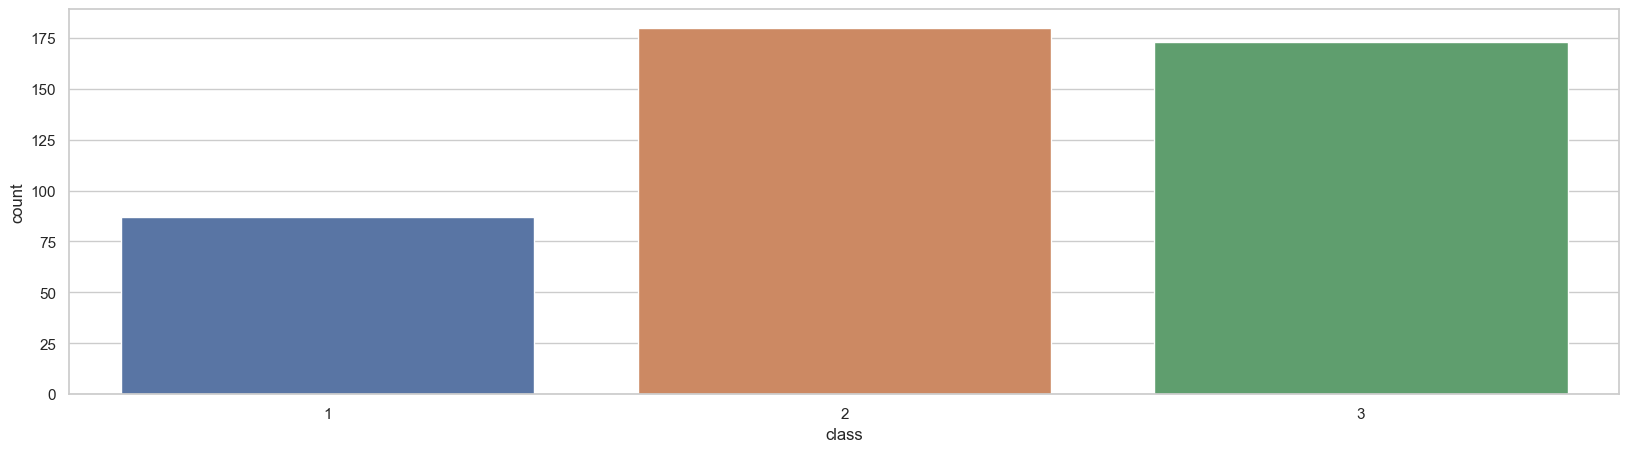

In [4]:
sns.countplot(data = df, x = "class")
plt.show()

In [5]:
# separating the features and labels
x = df.drop(columns = ["class"])
y = df["class"]

In [6]:
x

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [7]:
y

0      2
1      2
2      2
3      1
4      1
      ..
435    2
436    2
437    2
438    3
439    3
Name: class, Length: 440, dtype: int64

In [8]:
# reducing the number of dimensions to 2 using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x.shape

(440, 7)

In [9]:
x = pca.fit_transform(x)
x.shape

(440, 2)

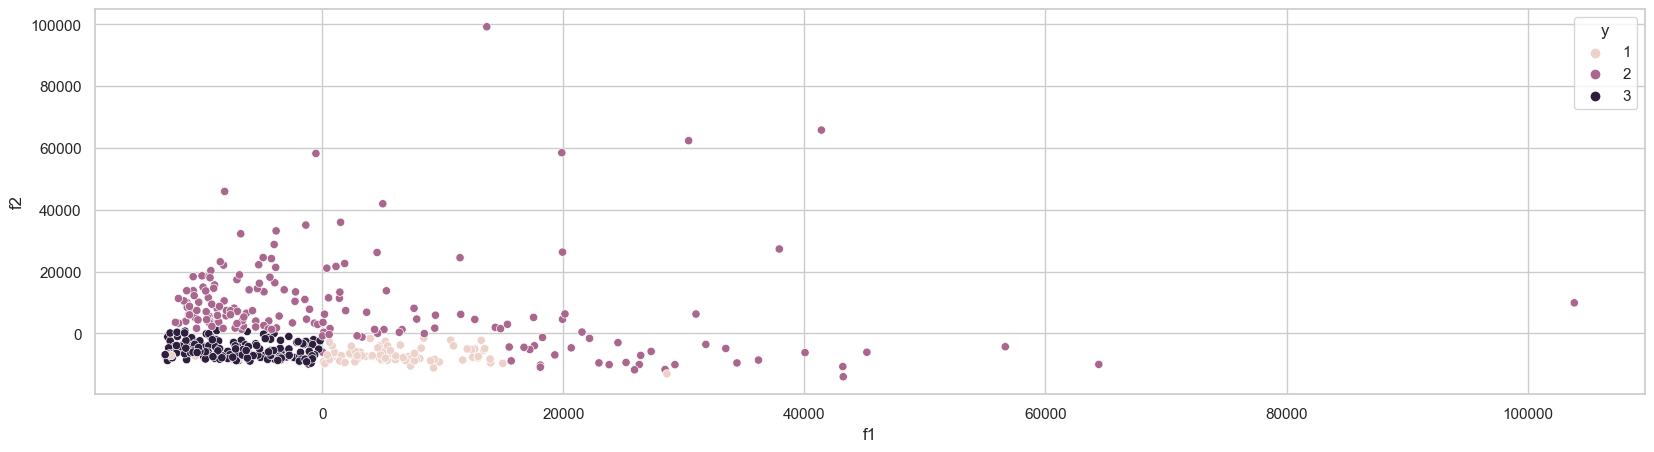

In [10]:
# plotting the data
df2 = pd.DataFrame(x, columns = ["f1", "f2"])
df2["y"] = y
sns.scatterplot(data = df2, x = "f1", y = "f2", hue = "y")
plt.show()

In [11]:
# splitting the data into train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 29)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((352, 2), (88, 2), (352,), (88,))

In [12]:
# scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [14]:
y_pred = model.predict(x_test)
y_pred

array([3, 1, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2, 2, 3, 2,
       3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 3, 3, 3, 2, 1, 2, 3,
       3, 2, 3, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 3, 1,
       2, 3, 3, 3, 1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 2, 3, 3, 3, 3])

In [15]:
model.score(x_test, y_test)

0.8977272727272727

In [16]:
# sklearn helps in finding the following information
# consider a query point x_i
x_i = [x_test[50]]
x_i

[array([0.39008231, 0.6366507 ])]

In [17]:
model.predict(x_i)

array([2])

In [18]:
model.predict_proba(x_i)

array([[0., 1., 0.]])

In [19]:
model.kneighbors(x_i)

(array([[0.16312533, 0.37005757, 0.42080579, 0.43665065, 0.45127669]]),
 array([[150, 244, 279, 314, 171]]))

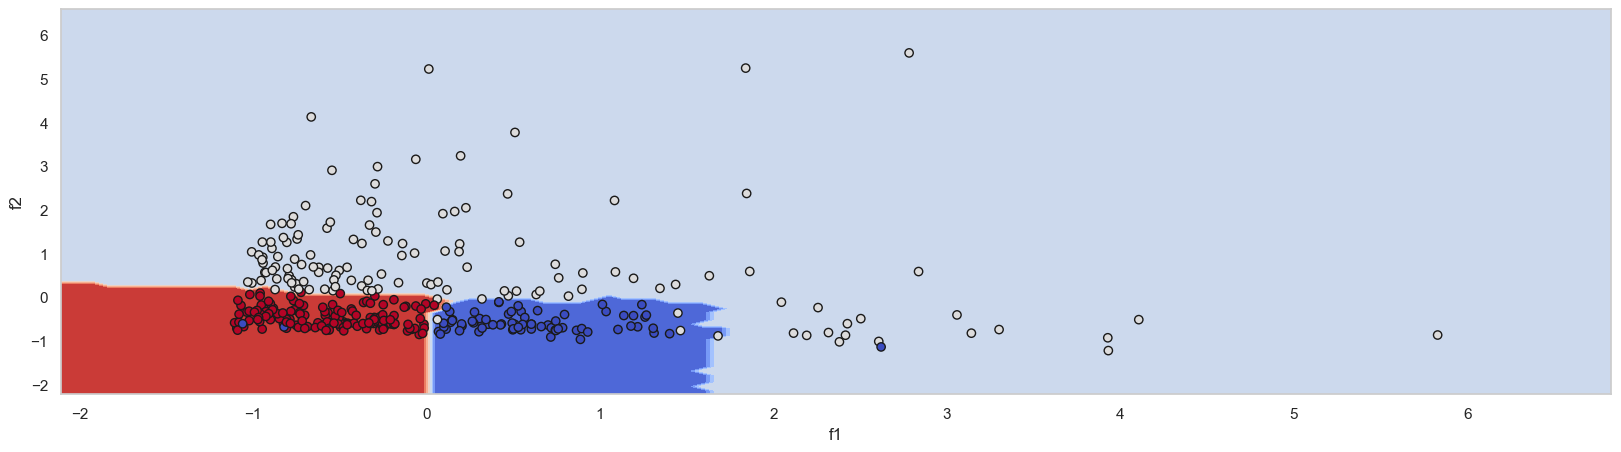

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(model, x_train, response_method = "predict", xlabel = "f1", ylabel = "f2", cmap = plt.cm.coolwarm)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c = y_train, edgecolors = "k", cmap = plt.cm.coolwarm)
plt.show()

In [21]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.77      0.69        13
           2       0.97      0.88      0.93        43
           3       0.94      0.97      0.95        32

    accuracy                           0.90        88
   macro avg       0.85      0.87      0.86        88
weighted avg       0.91      0.90      0.90        88



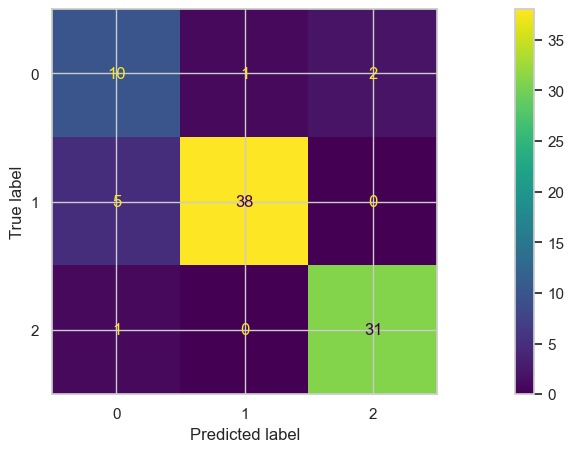

In [22]:
# plotting the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Curse of Dimensionality
The curse of dimensionality refers to the challenges that arise when analyzing data with a high number of features (dimensions). As the number of dimensions increase, several issues can significantly impact the performance of machine learning algorithms and data analysis methods.

### Data sparsity
- Imagine data points in a low-dimensional space (e.g., a few features). They are relatively close together, and it is easy to find patterns or relationships between them.
- In a high dimensional space (many features), the same number of data points become spread out very thinly. The data becomes sparse, making it difficult to find meaningful patterns or relationships between features. There's simply "too much space" for the data points to occupy.

### Increased distance metrics
- Distance metrics like Euclidean distance becomes less informative in high dimensions. The notion of "closeness" loses its meaning as all the distances tend to become similar. This can affect algorithms that rely on distance calculations, like K-Nearest Neighbors (KNN), for finding similar data points.
- Therefore, manhattan distance is preferred when the number of dimensions increase.

### High computational cost
Many machine learning algorithms involve calculation or comparison between data points across all features. As the number of features increase, the computational cost of these operations grows exponentially. Training and using models can become very slow or infeasible for extremely high dimensional data.

### Overfitting
With a large number of features, there's a higher chance of random noise or irrelevant features influencing the model. This can lead to overfitting, where the model performs well on the training data but fails to generalize on unseen data. The model essentially memorizes specific data points in the high dimensional space rather than learning generalizable patterns.

### Impact
The curse of dimensionality can significantly hinder the effectiveness of various data analysis techniques, including,
- Machine learning: Classification, regression, clustering algorithms can all suffer from the issues mentioned above, leading to poor performance and inaccurate results.
- Data visualization: Visualizing high-dimensional data becomes challenging as it's difficult to represent many features in a single plot.

### Mitigation strategies
- Dimensionality reduction: Techniques like Principal Component Analysis (PCA) or feature selection can help reduce the number of features while preserving the most important information. This creates a lower-dimensional space where analysis becomes more manageable.
- Sparse learning techniques: Some algorithms are designed to work well with high-dimensional data by incorporating sparsity assumptions (e.g., LASSO regression). These methods encourage models to rely on only a few relevant features.
- Domain knowledge: Leveraging your understanding of the data and the problem can help identify the most relevant features and guide dimensionality reduction or feature selection techniques.

# Optimizing KNN using Local Sensity Hashing (LSH)
KNN can be computationally expensive for large datasets due to the need to compare a new data point to all the existing data points to find the nearest neighbors. Locality Sensity Hashing (LSH) can be used to optimize KNN, and improve it efficiency in high dimensional data.

### The challenge of KNN in high dimensions
- Standard KNN has a time complexity of $O(n * d)$ for a single query.
- Calculating distances between data points in high dimensions becomes expensive.

### How LSH helps?
LSH is a technique that maps similar data points in the original high-dimensional space to the same, or similar hash values with a high probability. During a KNN search with LSH,
- The query point, and all data points are hashed using mulitple LSH functions (creating multiple has tables).
- Only data points that collide (map to the same hash value) in all, or most LSH functions are considered as potential neighbors.
- The distances are then calculated only for these shortlisted candidates, significantly reducing the number of comparisons needed.

### Benefits of LSH
- Reduced runtime: By eliminating the need to compare the query point to all data points, LSH can significantly speed up KNN searches, especially in high-dimensional datasets.
- Scalability: LSH allows KNN to handle larger datasets more efficiently, making it more practical for real-world applications.

### Implementational considerations
- There's a trade-off between efficiency and accuracy. LSH introduces some probability of missing true nearest neighbors due to collisions or not colliding with relevant points.
- The number of LSH functions and the desired collision probability need to be tuned for optimal performance.
- LSH works best when the distance metric used in KNN is compatible with the hashing scheme employed by LSH (e.g., using cosine similarity with Angle-LSH).

# Missing Value Imputation using KNN
KNN imputation is a popular technique for handling missing value in the datasets. It leverages the similarity between data points to estimate the missing value for a specific sample. 

Steps involved,
1. Identifying missing values: Locate all data points with missing values in the dataset.
2. Define K neighbors: Choose the number of K nearest neighbors to consider for imputation. A common starting point is K = 5.
3. Distance metric: Select a distance metric to measure the similarity between data points. Euclidean distance is a common choice, but others like Manhattan or Minkowski distance might be suitable depending on the data.
4. Find the nearest neighbors: For each data point with a missing value, identify the K nearest neighbors in the dataset based on the chosen distance metric. Only consider data points with complete values for the feature with the missing value.
5. Impute the missing value.

There are 2 common approaches to imputing missing values,
- Mean imputation: Calculate the average value of the chosen feature for the K nearest neighbors. This imputed value replaces the missing value in the original data point.
- Weighted mean imputation: Assign weights to the nearest neighbors based on their distance to the point with the missing value. Closer neighbors receive higher weights, influencing the imputation more. Then, calculate the weighted average of the feature values from the neighbors to estimate the missing value.

In [23]:
df = pd.read_csv("imputation_dataset.csv")
df.head()

,Unnamed: 0,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [24]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [25]:
# missing value detection
df.isna().sum()

Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [26]:
df.isna().sum().sum()

74

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("imputer", KNNImputer(n_neighbors = 5))
    ]
)

# fit and transform the df using the pipeline
df_transformed = pipeline.fit_transform(df)
df_transformed

array([[ 0.55543839, -0.23339469,  0.18730964, ..., -0.55468128,
        -0.27283047, -0.17538627],
       [ 0.55543839, -0.61643062,  0.20463194, ..., -0.28191652,
        -0.16514725, -0.05174065],
       [ 0.55543839, -0.66448075,  0.09192451, ..., -0.16861694,
        -0.12635346,  1.66123104],
       ...,
       [ 0.55543839,  0.92922722,  0.45670514, ...,  1.7220587 ,
        -0.70634675,  0.069082  ],
       [ 0.55543839,  1.57933722, -0.73785863, ...,  0.2022938 ,
        -0.72182947,  0.10916803],
       [ 0.55543839, -0.69002103,  0.84330737, ..., -0.51538765,
         1.8437797 , -0.02605172]])

In [28]:
# converting df_transformed into a DatatFrame
df_transformed = pd.DataFrame(df_transformed, columns = df.columns)
df_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.200717,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [29]:
# checking for missing values after transformation
df_transformed.isna().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Hyperparameters in KNN
1. Number of Neighbors (K): This parameter determines how many of the closest